# P3 - CONCEPTION APPLICATION POUR SANTE PUBLIQUE

L'agence "Santé publique France" a lancé un appel à projets pour trouver des idées innovantes d’applications en lien avec l'alimentation.

<p>Je propose alors une application <strong>QUALECO</strong> qui permet de définir, pour un aliment, deux SCORES :</p>
<ul>
    <li> <strong>QUAL</strong> : qualifiant si l'aliment est nutritif et sain pour l'homme ; </li>
    <li> <strong>ECO</strong> : notant si l'aliment est respectueux de l'environnement.</li>
</ul>

<hr/>

# *Partie 2 : Exploration des données*

<hr/>

## I. Importation des Librairies utiles

Ici on importe les librairies utilisés tout au long de l'étude.

In [2]:
# librairies pour les graphes
%matplotlib  inline
import matplotlib.pyplot as plt
import seaborn as sns

# librairies pour les analyses
import pandas as pd
import numpy as np
import math
import scipy.stats as stats

#import _multiprocessing
#_multiprocessing.sem_unlink = None
from mlxtend.preprocessing import standardize
from mlxtend.feature_extraction import PrincipalComponentAnalysis
from mlxtend.plotting import plot_pca_correlation_graph

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import decomposition
from sklearn import preprocessing 

# librairies pour les i/o
import io

<hr />

## II. Importation des données
<p> Ici on importe les données à partir des fichiers .csv téléchargés sur le site de la Banque Mondiale. </p>

In [3]:
# importation du jeu de données à partir de .csv
df = pd.read_csv('../Dataset/cleaned_data.csv',sep="\t")

In [4]:
data = df[['product_name', 'main_category', 'nutriscore_score','nutriscore_grade',
           'additives_n', 'ingredients_palm_oil_n',
           'labels', 'origins', 'manufacturing_places', 'packaging','biologic', 'plastic', 'ingredients_france', 'made_france']]

In [5]:
#affichage des premières lignes
data.head(3)

,product_name,main_category,nutriscore_score,nutriscore_grade,additives_n,ingredients_palm_oil_n,labels,origins,manufacturing_places,packaging,biologic,plastic,ingredients_france,made_france
0,Tarte noix de coco,en:coconut-pies,14.0,d,3.0,0.0,unknown,unknown,unknown,plastic,2.0,1.0,2.0,2.0
1,Compote de poire,en:pear-compotes,-2.0,a,0.0,0.0,unknown,unknown,unknown,unknown,2.0,2.0,2.0,2.0
2,BAguette bressan,en:baguettes,-4.0,a,3.0,0.0,unknown,unknown,unknown,unknown,2.0,2.0,2.0,2.0


<hr/>

## II. Analyses des données

### 1. Analyses univariées

* **Distiction des variables quantitatives et qualitatives**

In [6]:
var_int = [col for col in data.columns if data[col].dtypes=='float64']

In [7]:
var_cat = ['nutriscore_grade','labels','origins','manufacturing_places','packaging']

* **Statistiques descriptives**

In [8]:
data.describe()

,nutriscore_score,additives_n,ingredients_palm_oil_n,biologic,plastic,ingredients_france,made_france
count,178330.000000,178330.000000,178330.000000,178330.000000,178330.000000,178330.000000,178330.000000
mean,7.603163,2.808117,0.053345,1.833247,1.944743,1.981977,1.970689
std,8.844911,3.712818,0.237100,0.550498,0.305555,0.185738,0.236707
min,-14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000
50%,7.000000,1.000000,0.000000,2.000000,2.000000,2.000000,2.000000
75%,15.000000,4.000000,0.000000,2.000000,2.000000,2.000000,2.000000
max,36.000000,39.000000,5.000000,2.000000,2.000000,2.000000,2.000000


<AxesSubplot:>

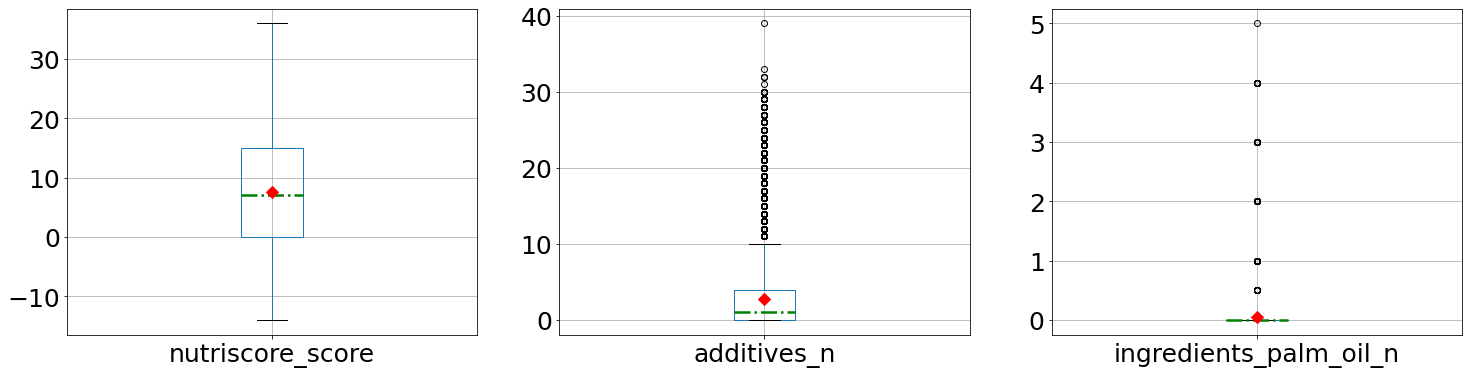

In [9]:
medianprops = dict(linestyle='-.', linewidth=2.5, color='green')
meanpointprops = dict(marker='D',markerfacecolor='red',markeredgecolor='red',markersize=8)

fig,axs = plt.subplots(1,3,figsize=(25,6))
data[['nutriscore_score']].boxplot(showmeans=True,medianprops=medianprops,meanprops=meanpointprops,ax=axs[0],fontsize=25)

data[['additives_n']].boxplot(showmeans=True,medianprops=medianprops,meanprops=meanpointprops,ax=axs[1],fontsize=25)

data[['ingredients_palm_oil_n']].boxplot(showmeans=True,medianprops=medianprops,meanprops=meanpointprops,ax=axs[2],fontsize=25)

* **Distribution**

array([[<AxesSubplot:title={'center':'nutriscore_score'}>,
        <AxesSubplot:title={'center':'additives_n'}>,
        <AxesSubplot:title={'center':'ingredients_palm_oil_n'}>],
       [<AxesSubplot:title={'center':'biologic'}>,
        <AxesSubplot:title={'center':'plastic'}>,
        <AxesSubplot:title={'center':'ingredients_france'}>],
       [<AxesSubplot:title={'center':'made_france'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

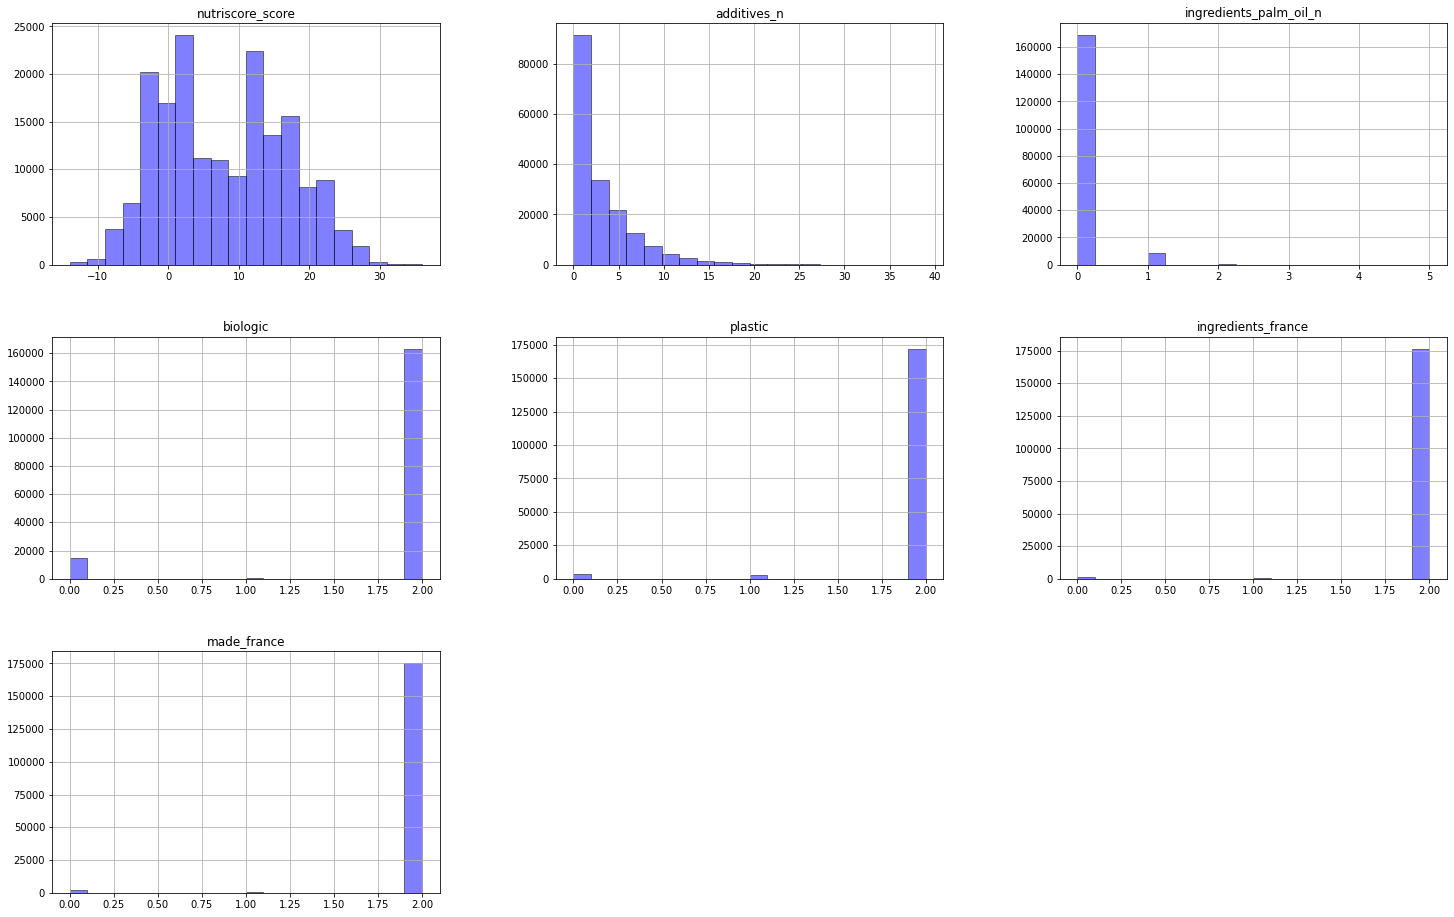

In [10]:
data.hist(bins=20,figsize=(25,16),color='b', edgecolor='k', alpha=0.5)

Text(0.5, 1.0, 'ingredients_palm_oil_n')

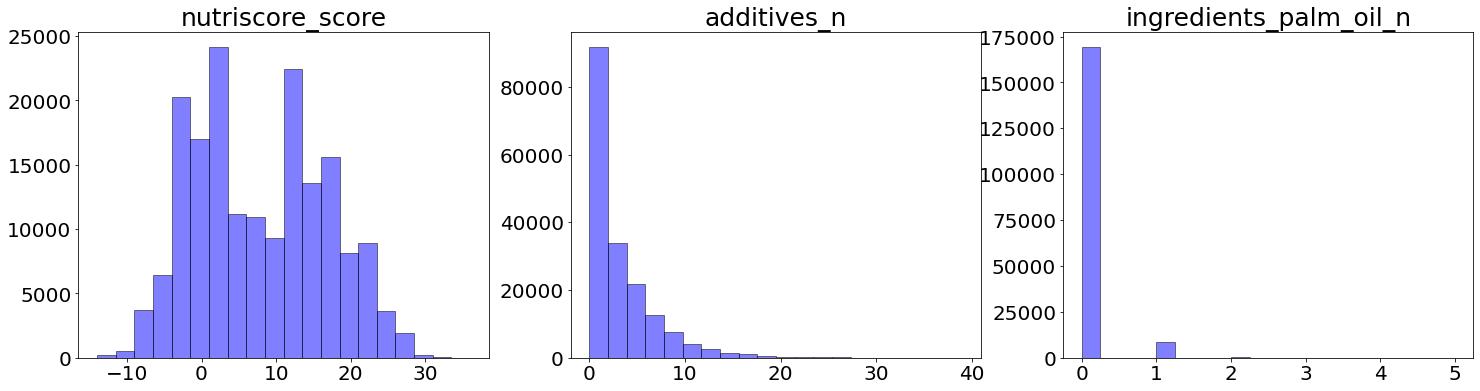

In [11]:
fig,axs = plt.subplots(1,3,figsize=(25,6))
axs[0].hist(data[['nutriscore_score']],bins=20,color='b', edgecolor='k', alpha=0.5)
axs[0].tick_params(axis='both', labelsize=20)
axs[0].set_title('nutriscore_score',fontsize=25)

axs[1].hist(data[['additives_n']],bins=20,color='b', edgecolor='k', alpha=0.5)
axs[1].tick_params(axis='both', labelsize=20)
axs[1].set_title('additives_n',fontsize=25)

axs[2].hist(data[['ingredients_palm_oil_n']],bins=20,color='b', edgecolor='k', alpha=0.5)
axs[2].tick_params(axis='both', labelsize=20)
axs[2].set_title('ingredients_palm_oil_n',fontsize=25)

/home/fanjama/snap/jupyter/common/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/fanjama/snap/jupyter/common/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/fanjama/snap/jupyter/common/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpret

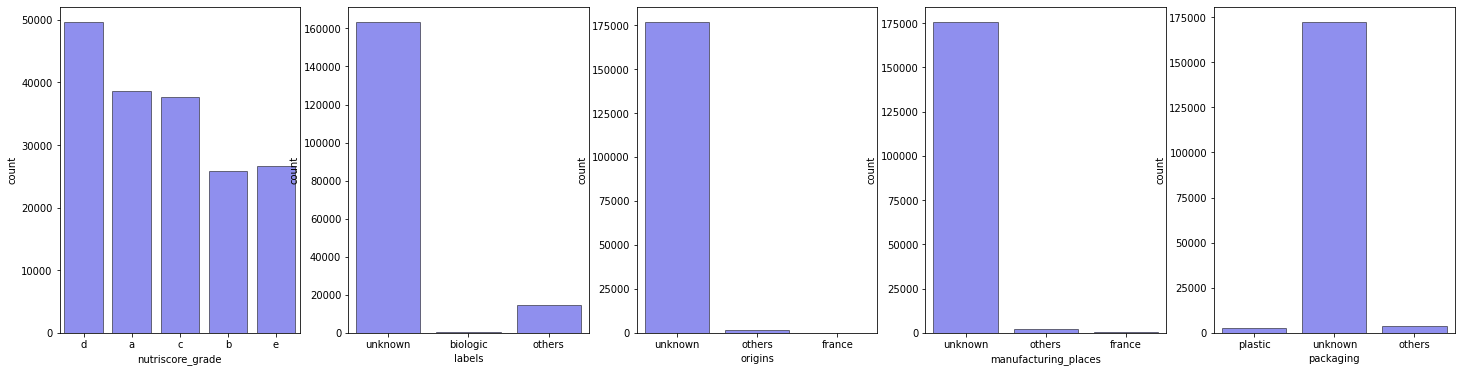

In [12]:
fig,axs = plt.subplots(1,5,figsize=(25,6))

for i in range(len(var_cat)):
    sns.countplot(data[var_cat[i]],ax=axs[i],color='b', edgecolor='k', alpha=0.5)

/home/fanjama/snap/jupyter/common/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/fanjama/snap/jupyter/common/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/fanjama/snap/jupyter/common/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpret

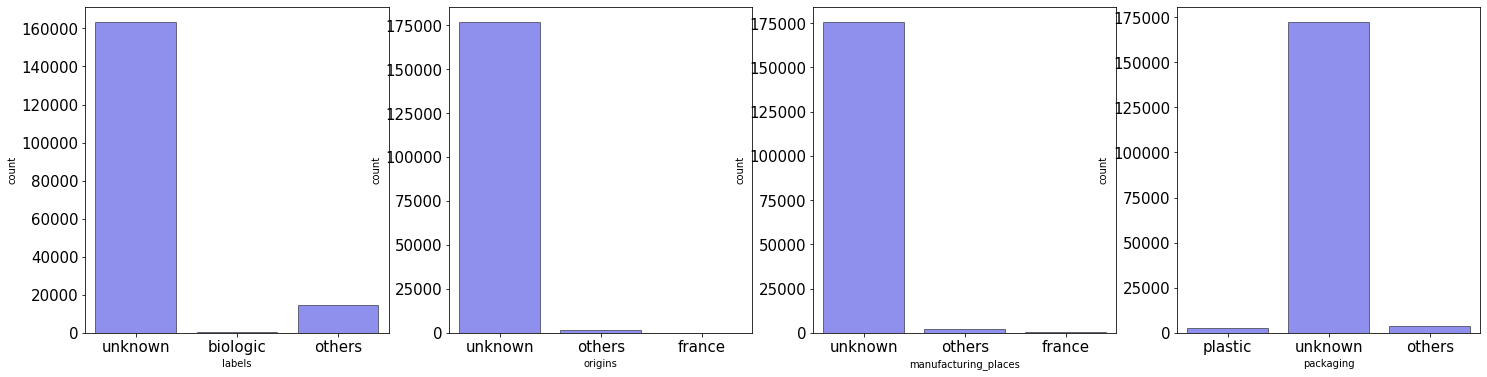

In [13]:
fig,axs = plt.subplots(1,4,figsize=(25,6))

var = ['labels','origins','manufacturing_places','packaging']
for i in range(len(var)):
    sns.countplot(data[var[i]],ax=axs[i],color='b', edgecolor='k', alpha=0.5)
    axs[i].tick_params(axis='both', labelsize=15)

* **Test normalité**

In [14]:
for col in var_int:
    print(col)
    print('-> AGOSTINO :' + str(stats.normaltest(data[col])))
    print('-> SHAPIRO :' + str(stats.shapiro(data[col])) + '\n')

nutriscore_score
-> AGOSTINO :NormaltestResult(statistic=36409.11091056799, pvalue=0.0)
-> SHAPIRO :ShapiroResult(statistic=0.9692760705947876, pvalue=0.0)

additives_n
-> AGOSTINO :NormaltestResult(statistic=80040.80001791254, pvalue=0.0)
-> SHAPIRO :ShapiroResult(statistic=0.7523467540740967, pvalue=0.0)

ingredients_palm_oil_n
-> AGOSTINO :NormaltestResult(statistic=172550.59842712432, pvalue=0.0)
-> SHAPIRO :ShapiroResult(statistic=0.2251061201095581, pvalue=0.0)

biologic
-> AGOSTINO :NormaltestResult(statistic=105741.16177361643, pvalue=0.0)
-> SHAPIRO :ShapiroResult(statistic=0.31093883514404297, pvalue=0.0)

plastic
-> AGOSTINO :NormaltestResult(statistic=190107.72562580885, pvalue=0.0)
-> SHAPIRO :ShapiroResult(statistic=0.17021113634109497, pvalue=0.0)

ingredients_france
-> AGOSTINO :NormaltestResult(statistic=278113.8414014314, pvalue=0.0)
-> SHAPIRO :ShapiroResult(statistic=0.0682910680770874, pvalue=0.0)

made_france
-> AGOSTINO :NormaltestResult(statistic=239589.66563264

/home/fanjama/snap/jupyter/common/lib/python3.7/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


**=> Aucune des variables ne présentent une distribution suivant la loi normale**

### 2. Analyses multivariées

- **Corrélation : variables quantitatives**

In [15]:
corr = data.corr(method='pearson')
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,nutriscore_score,additives_n,ingredients_palm_oil_n,biologic,plastic,ingredients_france,made_france
nutriscore_score,1.00,0.37,0.12,0.10,0.03,0.03,0.02
additives_n,0.37,1.00,0.31,0.13,0.05,0.04,0.04
ingredients_palm_oil_n,0.12,0.31,1.00,0.02,-0.03,-0.01,-0.02
biologic,0.10,0.13,0.02,1.00,0.24,0.15,0.20
plastic,0.03,0.05,-0.03,0.24,1.00,0.45,0.56
ingredients_france,0.03,0.04,-0.01,0.15,0.45,1.00,0.60
made_france,0.02,0.04,-0.02,0.20,0.56,0.60,1.00


Quelques Vérifications

In [16]:
slope,intercept,r_value,p_value,std_err = stats.linregress(data['nutriscore_score'],data['additives_n'])
r_value

0.3696874461455325

In [17]:
slope,intercept,r_value,p_value,std_err = stats.linregress(data['nutriscore_score'],data['ingredients_palm_oil_n'])
r_value

0.11666592557807173

In [18]:
slope,intercept,r_value,p_value,std_err = stats.linregress(data['additives_n'],data['ingredients_palm_oil_n'])
r_value

0.31070939739319586

* **Relation dépendance**

Toutes les variables

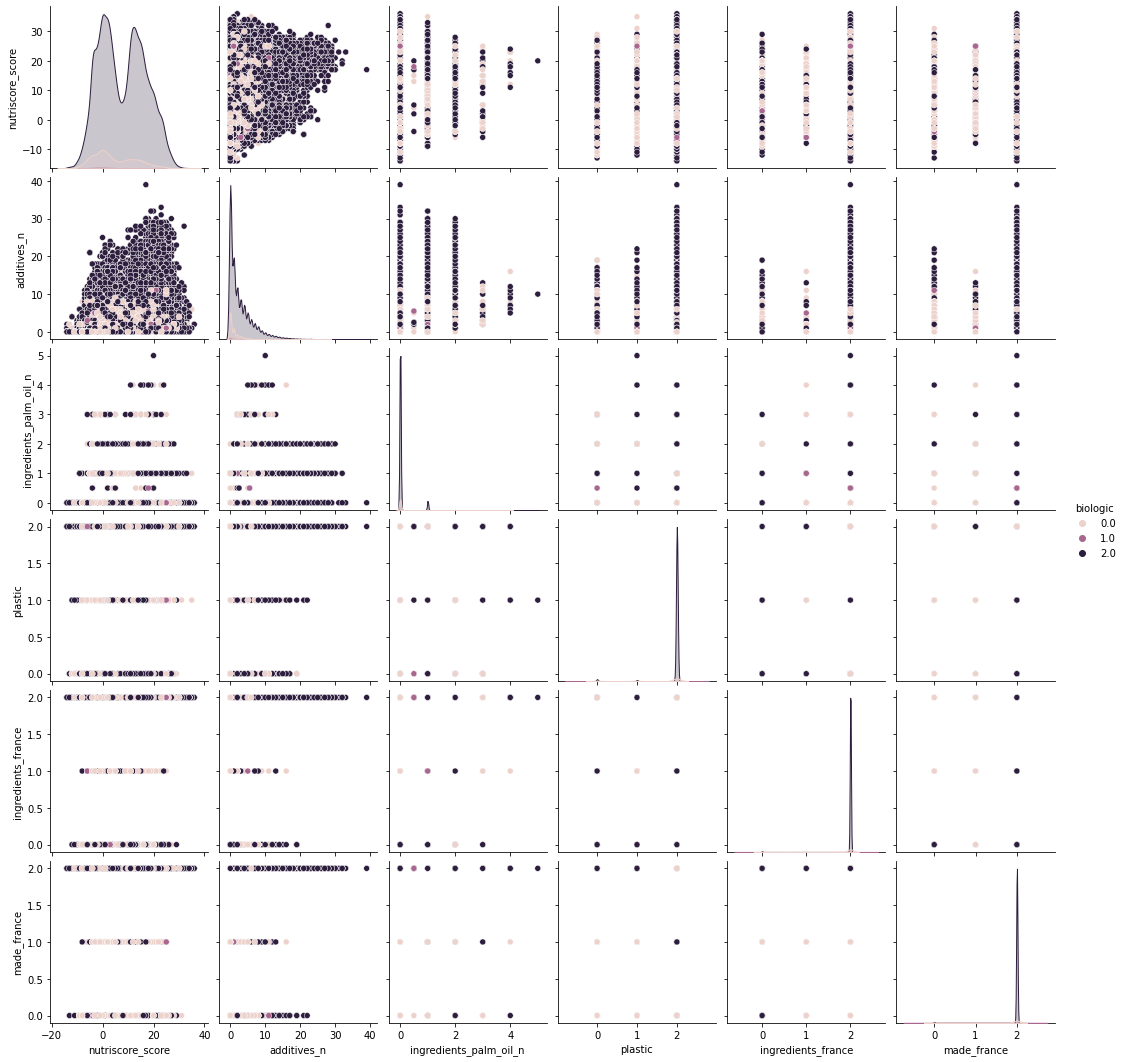

In [19]:
sns.pairplot(data,hue='biologic')

Variables d'intérêts

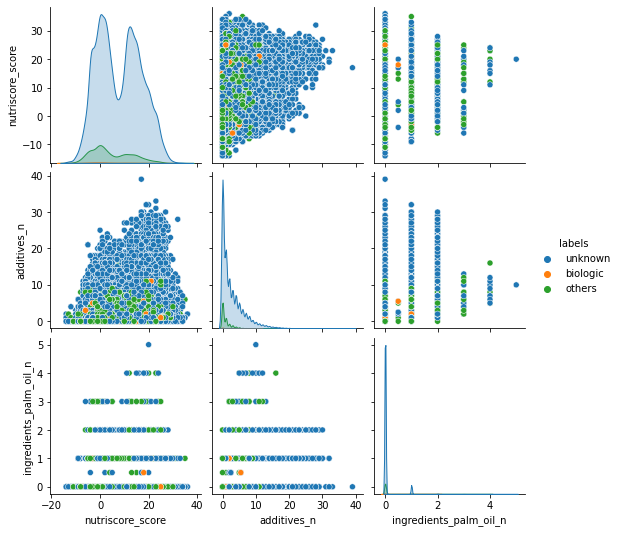

In [20]:
sns.pairplot(data[['nutriscore_score','additives_n','ingredients_palm_oil_n','labels']],hue='labels')

* **ACP**

In [32]:
# préparation des données pour l'ACP
X = data[var_int].values
features = var_int

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=4)
X_proj = pca.fit_transform(X_scaled)

# Contribution aux axes principales
ind_contrib = pd.DataFrame(X_proj,index=data.index,columns=['F'+str(i+1) for i in range(4)])
var_contrib = pd.DataFrame(pca.components_,columns=var_int,index=['ECO','QUAL','F3','F4'])

In [33]:
# Contribution des variables
var_contrib.T

,ECO,QUAL,F3,F4
nutriscore_score,-0.107672,0.536689,-0.308531,-0.583986
additives_n,-0.130236,0.639554,0.026983,-0.065620
ingredients_palm_oil_n,-0.026127,0.487845,0.607032,0.483305
biologic,-0.294329,0.144872,-0.676237,0.621675
plastic,-0.529990,-0.103531,0.004256,0.020670
ingredients_france,-0.528233,-0.123589,0.234891,-0.164073
made_france,-0.569398,-0.134021,0.152001,-0.085116


In [21]:
principalDf = ind_contrib[['F1','F2']]
finalDf = pd.concat([principalDf, data[['biologic']]], axis = 1)

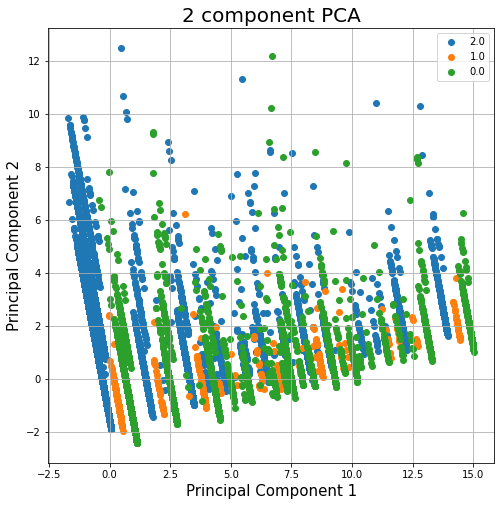

In [22]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
nutris = list(data['biologic'].unique())
colors = ['r', 'g', 'k']#, 'b', 'c']
for nutri, color in zip(nutris,colors):
    indicesToKeep = finalDf['biologic'] == nutri
    ax.scatter(finalDf.loc[indicesToKeep, 'F1'],
               finalDf.loc[indicesToKeep, 'F2'])
ax.legend(nutris)
ax.grid()

In [23]:
pca.explained_variance_ratio_

array([0.31378756, 0.22205345, 0.13193862, 0.12120449])

In [24]:
# préparation des données pour l'ACP

X = data.loc[:15000,features].values
X_norm = StandardScaler().fit_transform(X)

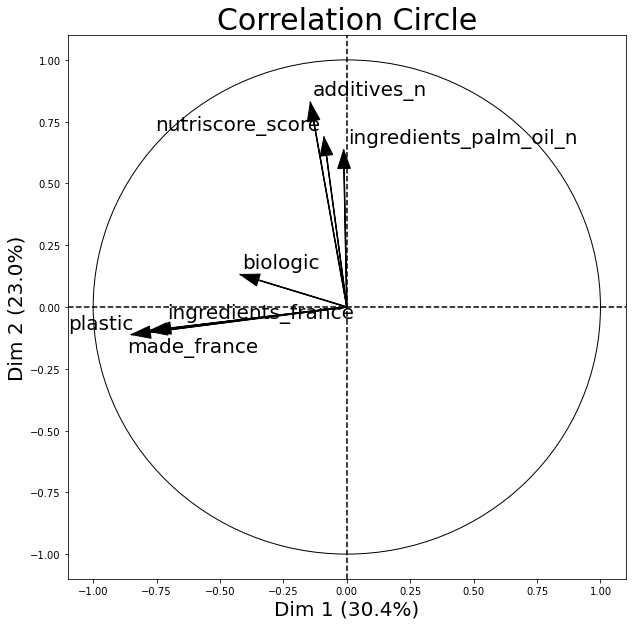

In [25]:
figure, correlation_matrix = plot_pca_correlation_graph(X_norm, 
                                                        features,
                                                        dimensions=(1, 2),
                                                        figure_axis_size=10)

In [26]:
correlation_matrix

,Dim 1,Dim 2
nutriscore_score,-0.090077,0.687805
additives_n,-0.143898,0.828322
ingredients_palm_oil_n,-0.012495,0.635525
biologic,-0.420240,0.131521
plastic,-0.782596,-0.098200
ingredients_france,-0.769179,-0.094422
made_france,-0.849498,-0.111693


### 3. Tests statistiques

- Réponse du nutriscore par rapport au nombre d'additif

In [36]:
stats.ttest_ind(data['additives_n'],data['biologic'])

Ttest_indResult(statistic=109.68143150515087, pvalue=0.0)

=> Rejet de HO
<p>Influence du nombre d'additifs sur le respect écologique du produit.</p>

In [27]:
stats.ttest_ind(data['made_france'],data['biologic'])

Ttest_indResult(statistic=96.85823360023842, pvalue=0.0)

=> Rejet de HO
<p>Influence de la place d'industrialisation sur le respect écologique du produit.</p>

- Réponse du nutrigrade selon catégorie d'aliment

In [28]:
X = 'manufacturing_places'
Y = 'labels'
cont = data[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).fillna(0).copy().astype(int)

In [29]:
cont.head()

labels,biologic,others,unknown
manufacturing_places,,,
france,49,174,86
others,110,1247,1102
unknown,314,13211,162037


In [30]:
st_chi2, st_p, st_dof, st_exp = stats.chi2_contingency(cont)

In [31]:
print('st_chi2 ' + str(st_chi2))
print('st_dof ' + str(st_dof))
print('st_p ' + str(st_p))

st_chi2 11643.371664710443
st_dof 4
st_p 0.0


=> Rejet de HO
<p>Influence de la place d'industrialisation sur le respect écologique du produit.</p>